In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
sns.set(style="whitegrid")
sns.set_palette("dark")

In [116]:
co2el = 140 # gram/kwh
co2fjern = 15 # kg. per. GJ
#1 GJ = 277.78 kwh
co2fjern *=  277.78 # kg pr. kwh
co2fjern /= 1000 # gram pr GJ
print(co2fjern)

4.1667


In [55]:
lblm = pd.read_excel('lbl4x8.xlsx')
p4 = pd.read_excel('p4x8.xlsx').T.values
h_tau4 = pd.read_excel('htau4x8.xlsx').T.values

ht = pd.read_excel('htau4x8.xlsx').T

In [56]:
p0 = [3.2833, 2.6639, 3.4477, 2.8283]
it = 0
prices = []
for i in range(0,p4.size,19):
    prices.append(np.append(p0[it],p4[0][i:i+19]))
    it += 1

In [117]:
price_lbl =['both types', 'rich only', 'poor only']

lbl = pd.read_excel('lbl.xlsx').values

htau = pd.read_excel('htau.xlsx').T.values
p = pd.read_excel('p.xlsx').T.values

htau_tc = pd.read_excel('htau_tc.xlsx').T.values
p_tc = pd.read_excel('p_tc.xlsx').T.values

htau_stc = pd.read_excel('htau_stc.xlsx').T.values
p_stc = pd.read_excel('p_stc.xlsx').T.values

htau_bstc = pd.read_excel('htau_bstc.xlsx').T.values
p_bstc = pd.read_excel('p_bstc.xlsx').T.values


htau_pup = pd.read_excel('htau_pup.xlsx').T.values
p_pup = pd.read_excel('p_pup.xlsx').T.values

htau_eng = pd.read_excel('htau_eng.xlsx').T.values
p_eng = pd.read_excel('p_eng.xlsx').T.values


ccp2 = pd.read_excel('ccp_tau_2.xlsx').values
ccp1 = pd.read_excel('ccp_tau_1.xlsx')

In [124]:
ccp2.reshape([20,20,20])

ValueError: cannot reshape array of size 10164 into shape (20,20,20)

In [58]:
def plot_prices(prices, lbls, savename):
    prices = np.array([np.append(3.2833,prices[i,:]) for i in range(prices.shape[0])])
    
    idx = np.arange(prices.shape[1])
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(prices.shape[0]):
        line1 = ax.plot(idx, prices[i], label=lbls[i])
    
    # Add gridlines
    ax.grid(False, which='both', axis='x')
    ax.set_axisbelow(True)

    # Add title and axis labels
    plt.xlabel('Housing Condition', fontsize=14, fontweight='bold')
    plt.ylabel('Trading Prices Millions DKK', fontsize=14, fontweight='bold')

    # Add legend
    ax.legend()

    # Remove box around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Change fontsize for axis labels and tick marks
    ax.tick_params(axis='both', labelsize=14)
    
    plt.xticks(idx,labels = idx)
    

    # Save the figure as an image file
    plt.savefig(savename)
    plt.show()
    

In [59]:
def sorted_eq_plot(h_tau, lbl_types, tw, savename):
    
    it = 1
    last_row = h_tau[-1]
    maxh =  h_tau.sum(axis=1)[:-1].max()
    fig, ax = plt.subplots(figsize=(10,6))
    if last_row.sum() > maxh:
        
        while last_row.sum() > maxh:
            last_row_half = np.divide(last_row, it)
            # Create two new rows with the halved values
            
            vals = [h_tau[:-it]]
            for _ in range(it):
                vals.append(last_row_half)

            h_tau = np.vstack(vals)
         
            idx = np.arange(h_tau.shape[0])
            idx[-it] = idx[-it] + it
            
            h_tau_ = h_tau/h_tau.sum(axis=0)
        
            h_tau= h_tau_ * tw
            last_row = h_tau[-it]
            maxh =  h_tau.sum(axis=1)[:-it].max()
            it +=1
    else:
        idx = np.arange(h_tau.shape[0])
        idx[-1] = idx[-1] + 1
        h_tau = h_tau/h_tau.sum(axis=0) * tw
    
    # Add gridlines
    for i in range(h_tau.shape[0]):
        if i%20==0 and i>0:
            idx[i] += 1
    
    
    bottom = np.zeros(len(idx))
    for i in range(h_tau.shape[1]):
        ax.bar(idx, h_tau[:, i], bottom=bottom, label=lbl_types[i])
        bottom += h_tau[:, i]

    


    plt.xticks(idx,labels = idx)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    htypes = iter(['LDH', 'SDH', 'LHP', 'SHP'])
    if h_tau.shape[0] > 21:
        for i in range(len(labels)-1):
            labels[i] = ''
        for i in range(len(labels)-1):
            if i%20 ==0:
                labels[i +10] = next(htypes)
       
    labels[-1] = 'No Ownership'
    #for num in range(1, it):
    #    labels[-num] = ''
    #bar1 = ax.bar(idx, rich, label=rich_lbl)

    #bar2 = ax.bar(idx, poor , bottom= rich, label=poor_lbl)
    ax.grid(False, which='both', axis='x')
    ax.set_axisbelow(True)

    # Add title and axis labels
    if h_tau.shape[0] > 21:
        plt.xlabel('Housing Type', fontsize=14, fontweight='bold')
    else:
        plt.xlabel('Housing Condition', fontsize=14, fontweight='bold')
    plt.ylabel('% of the Population', fontsize=14, fontweight='bold')

    # Add legend
    ax.legend()



    # Remove box around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Change fontsize for axis labels and tick marks
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xticklabels(labels)

    # Save the figure as an image file
    plt.savefig(savename)
    plt.show()
    return h_tau

In [60]:
lbls = np.array(['R1A', 'P1A', 'R2A', 'P2A', 'R2A1C', 'P2A1C', 'R2A2C', 'P2A2C'])
lbl = np.array(['Rich', 'Poor'])
tw2 = [50,50]
twm = [i*100 for i in [0.2702, 0.2702, 0.1422, 0.1422, 0.0392, 0.0392, 0.0484, 1 - np.sum(0.2702 + 0.2702 + 0.1422 + 0.1422+  0.0392 + 0.0392 + 0.0484)]]

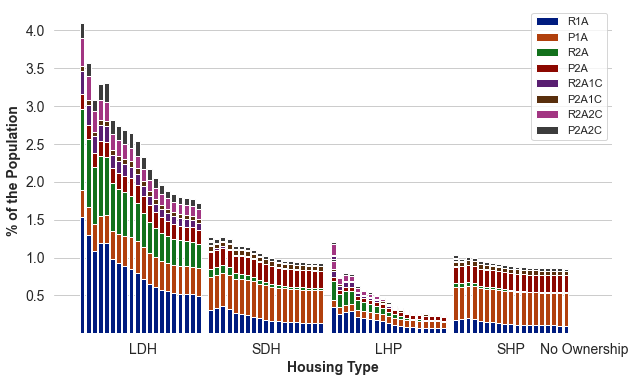

In [61]:
h4 = sorted_eq_plot(ht.values, lbls, twm, 'h4')

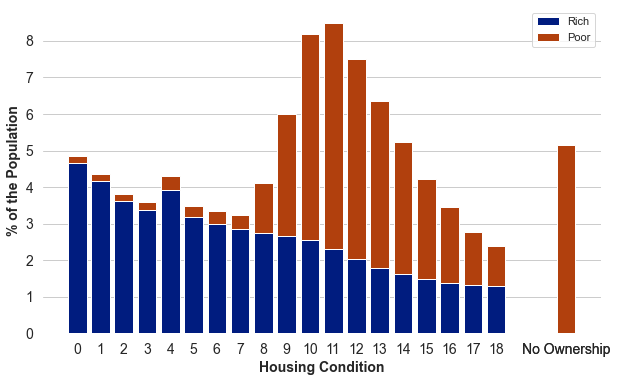

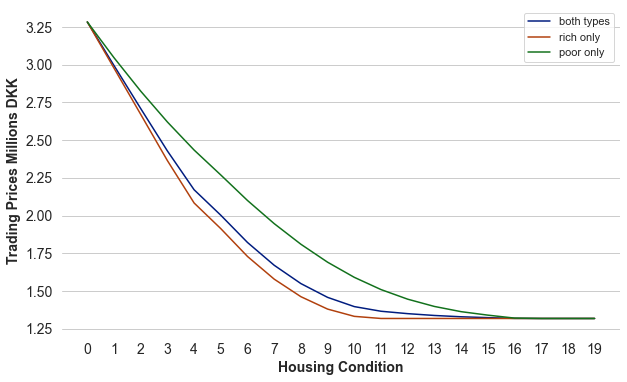

In [62]:
hb = sorted_eq_plot(htau, lbl, tw2, 'holdings')
plot_prices(p, price_lbl, 'price')

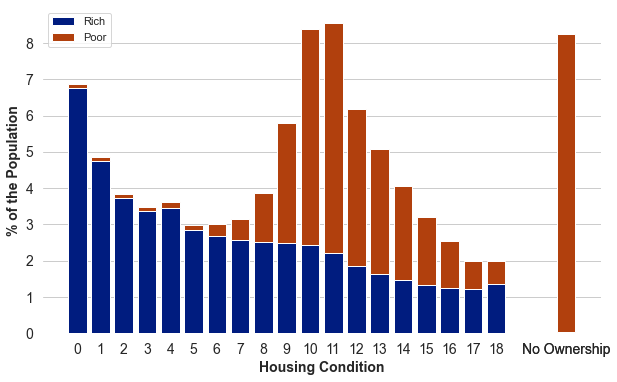

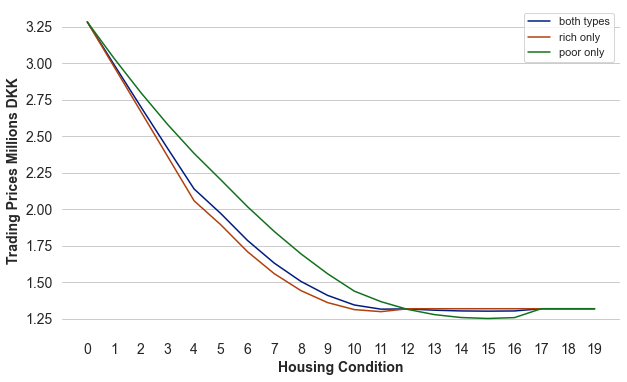

In [63]:
htd = sorted_eq_plot(htau_tc, lbl, tw2, 'holdings_tc1')
plot_prices(p_tc, price_lbl, 'price_tc1')

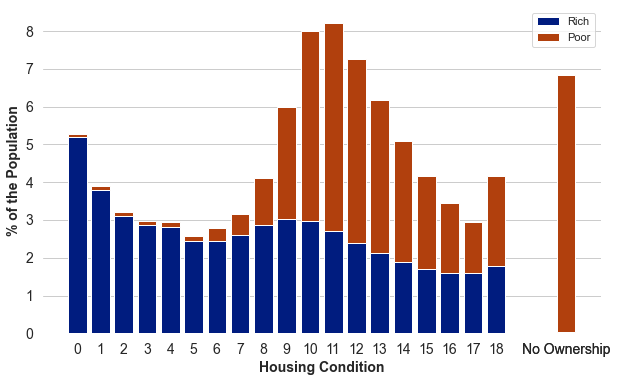

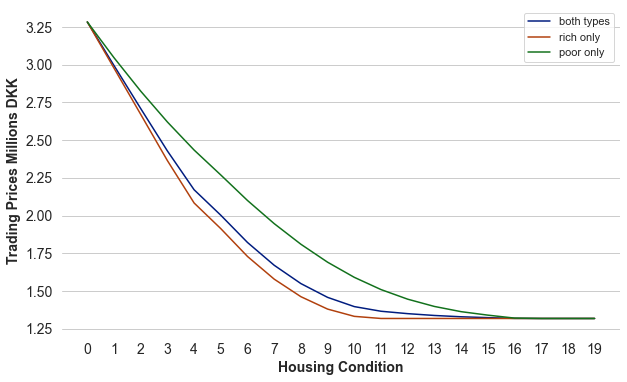

In [64]:
hts = sorted_eq_plot(htau_stc, lbl, tw2, 'holdings_stc1')
plot_prices(p_stc, price_lbl, 'price_stc1')

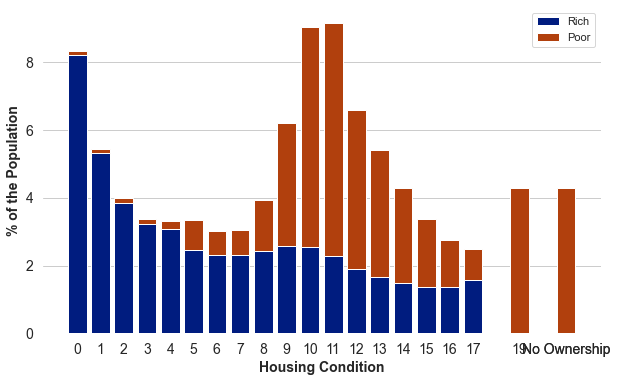

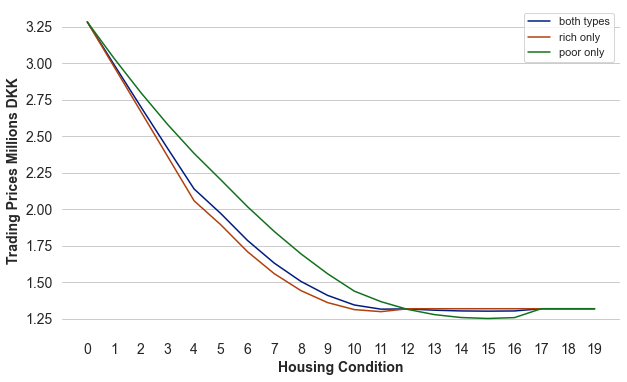

In [65]:
htsd = sorted_eq_plot(htau_bstc, lbl, tw2, 'holdings_bstc1')
plot_prices(p_bstc, price_lbl, 'price_btc1')

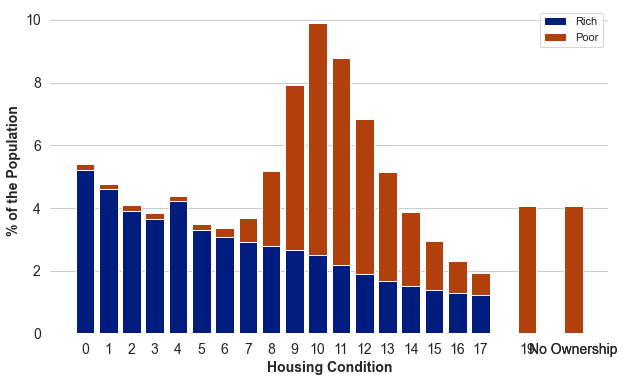

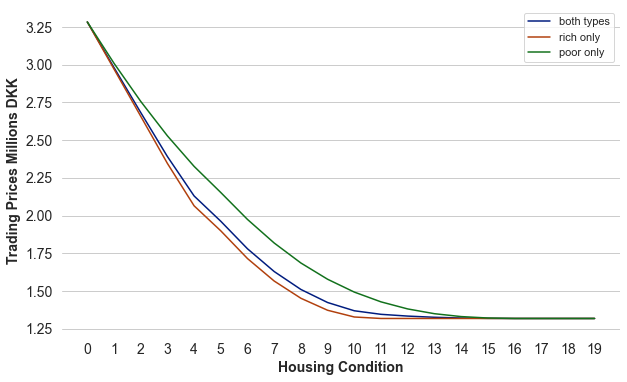

In [66]:
he = sorted_eq_plot(htau_eng, lbl, tw2, 'holdings_eng')
plot_prices(p_eng, price_lbl, 'price_eng')

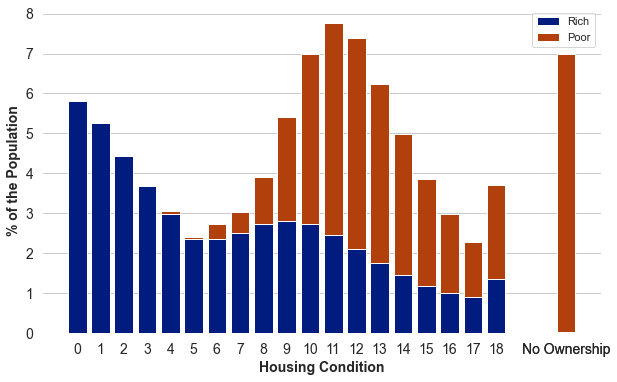

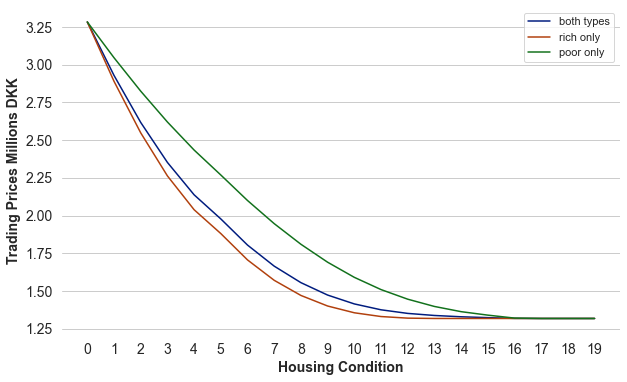

In [67]:
hp = sorted_eq_plot(htau_pup, lbl, tw2, 'holdings_pup2')
plot_prices(p_pup, price_lbl, 'price_pup2')

In [105]:
p_list = [p_tc[0], p_stc[0], p_bstc[0], p_eng[0], p_pup[0]]
p_mat = np.zeros([5, 19]) + np.nan
for it, i in enumerate(p_list):
    p_mat[it] = np.round((p[0] - i)*1000,2)

In [106]:

df = pd.DataFrame(p_mat)

# print the resulting DataFrame
df.T

,0,1,2,3,4
0,2.92,0.0,2.92,13.75,65.37
1,6.05,0.0,6.05,26.12,91.77
2,9.40,0.0,9.40,36.92,75.89
3,32.33,0.0,32.33,41.13,33.44
4,31.88,0.0,31.88,40.00,24.36
5,35.69,0.0,35.69,41.84,17.10
6,39.70,0.0,39.70,41.53,5.77
7,43.91,0.0,43.91,38.94,-6.23
8,48.35,0.0,48.35,34.04,-15.35
9,53.02,0.0,53.02,27.63,-17.80


In [85]:
h_list = [htd, hts, htsd, he, hp]
h_mat = np.zeros([5, 21, 2]) + np.nan
for it, i in enumerate(h_list):
    h_mat[it] = np.round(hb - i,2)

In [94]:
# create a multi-column index
cols = pd.MultiIndex.from_product([['Rich', 'Poors'], np.arange(21)])

# create a pandas DataFrame with the array and index
df = pd.DataFrame(h_mat.reshape(5, -1), columns=cols)

# print the resulting DataFrame
df.T

0     1     2     3     4
Rich  0  -2.11 -0.53 -3.56 -0.56 -1.15
      1   0.08  0.09  0.08  0.01  0.18
      2  -0.57  0.37 -1.14 -0.42 -1.08
      3   0.07  0.08  0.06  0.01  0.17
      4  -0.10  0.52 -0.22 -0.29 -0.81
      5   0.07  0.08  0.05  0.01  0.16
      6   0.02  0.51  0.15 -0.27 -0.30
      7   0.09  0.09  0.07  0.02  0.16
      8   0.46  1.11  0.83 -0.31  0.92
      9   0.24  0.26  0.16  0.22  0.33
      10  0.34  0.73  0.73 -0.12  0.81
      11  0.16  0.18 -0.58  0.12  0.26
      12  0.32  0.54  0.67 -0.08  0.63
      13  0.00  0.00 -0.34  0.07 -0.02
      14  0.28  0.24  0.54 -0.05  0.33
      15 -0.20 -0.15 -0.34 -0.37 -0.11
      16  0.23 -0.10  0.33 -0.04  0.03
      17  0.03  0.11 -0.14 -1.02  0.17
      18  0.18 -0.34  0.08  0.00 -0.14
      19  0.01  0.35 -0.31 -1.94  0.72
      20  0.12 -0.43  0.01  0.06 -0.17
Poors 0  -0.33  0.63 -0.86 -1.79  1.36
      1   0.08 -0.42  0.02  0.12 -0.17
      2  -0.15  0.70 -0.69 -0.41  0.89
      3   0.17 -0.37  0.12  0.13 -0.09
      4   1.15  0.62  0.78  0.54  0.21
      5   0.17 -0.32  0.14  0.13  0.04
      6   1.12  0.52  0.82  1.07  0.08
      7   0.16 -0.27  0.14  0.13  0.17
      8   1.02  0.41  0.80  1.25  0.09
      9   0.15 -0.23  0.12  0.11  0.28
      10  0.88  0.31  0.72  1.18  0.09
      11  0.12 -0.23  0.02  0.10  0.37
      12  0.77  0.23  0.66  1.03  0.09
      13  0.08 -0.28 -0.25  0.09  0.41
      14  0.71  0.12  0.53  0.77  0.10
      15 -0.06 -0.49  1.28  1.28 -0.05
      16  0.45 -1.27 -3.18 -2.95 -1.27
      17 -0.02 -0.01 -0.01 -0.01 -0.02
      18 -3.09 -1.68  0.86  1.09 -1.83
      19 -0.02 -0.01 -0.01 -0.01 -0.02
      20 -3.09 -1.68  0.86  1.09 -1.83